# Import Libraries

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download Data

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

# Plot Examples

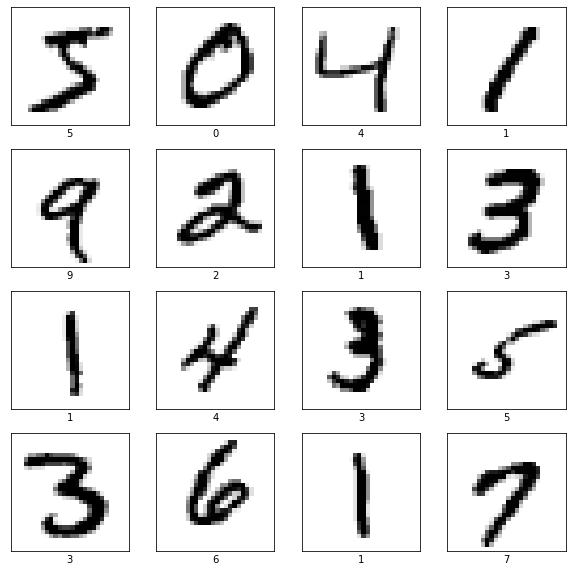

In [5]:
plt.figure(figsize=(10,10))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i],cmap="binary")
    plt.xlabel(str(y_train[i]))
    plt.xticks([])
    plt.yticks([])

# Normalize Data

In [7]:
print(x_train.shape)

x_train=np.reshape(x_train,(60000,28*28))


x_test=np.reshape(x_test,(10000,28*28))
x_train=x_train/255.
x_test=x_test/255.


(60000, 784)


In [8]:
x_train[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

# Create a Neural Network Model

In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,activation="sigmoid" ,input_shape=(784,)),
    tf.keras.layers.Dense(32,activation="sigmoid"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

# Train the Model

In [10]:
model.fit(x_train,y_train,
         validation_data=(x_test,y_test),
         epochs=20,batch_size=64,
         verbose=2
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 3s - loss: 2.2969 - accuracy: 0.1294 - val_loss: 2.2744 - val_accuracy: 0.1804
Epoch 2/20
60000/60000 - 3s - loss: 2.1627 - accuracy: 0.2906 - val_loss: 1.9309 - val_accuracy: 0.3842
Epoch 3/20
60000/60000 - 2s - loss: 1.6650 - accuracy: 0.4528 - val_loss: 1.4344 - val_accuracy: 0.5274
Epoch 4/20
60000/60000 - 2s - loss: 1.2781 - accuracy: 0.5787 - val_loss: 1.1254 - val_accuracy: 0.6415
Epoch 5/20
60000/60000 - 2s - loss: 1.0205 - accuracy: 0.6590 - val_loss: 0.9289 - val_accuracy: 0.6820
Epoch 6/20
60000/60000 - 2s - loss: 0.8731 - accuracy: 0.7053 - val_loss: 0.8209 - val_accuracy: 0.7361
Epoch 7/20
60000/60000 - 2s - loss: 0.7852 - accuracy: 0.7384 - val_loss: 0.7442 - val_accuracy: 0.7592
Epoch 8/20
60000/60000 - 2s - loss: 0.7192 - accuracy: 0.7650 - val_loss: 0.6850 - val_accuracy: 0.7775
Epoch 9/20
60000/60000 - 2s - loss: 0.6610 - accuracy: 0.7897 - val_loss: 0.6280 - val_accuracy: 0.8012
Epoch 10/20
60

# Save the Model

In [11]:
model.save('model.h5')

# ML Server

In [13]:
%%writefile ml_server.py

import json
import tensorflow as tf
import numpy as np
import random
from flask import Flask,request

app=Flask(__name__)

model=tf.keras.models.load_model("model.h5")

feature_model=tf.keras.models.Model(model.inputs,
                                   [layer.output for layer in model.layers])

_,(x_test,_)=tf.keras.datasets.mnist.load_data()
x_test=x_test/255.

def get_prediction():
    index=np.random.choice(x_test.shape[0])
    image=x_test[index,:,:]
    image_arr=np.reshape(image,(1,784))
    return image       #feature_model.predict(image_arr),

@app.route('/',methods=['get','post'])
def index():
    if request.method=='post':
        image=get_prediction()  #preds,
        final_preds=[p.tolist() for  p in preds]
        return json.dumps({'image':image})
    return "welcome to the model server"
@app.route("/hello")
def hello():
    return "hello ,this is second route" 

if __name__=='__main__':
    app.run()

Overwriting ml_server.py


# Streamlit Web App

In [14]:
%%writefile app.py

import streamlit as st
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

URI='http://127.0.0.1:5000'
st.title("Neural Network Visualiser")

st.sidebar.markdown("## Input Image")
st.sidebar.markdown("hello")

if st.button('Get random prediction'):
    response =requests.post(URI,data={})
    response =json.loads(response.text)
    #preds=response.get("prediction")

    image=response.get('image')
    image =np.reshape(image,(28,28))
    
    st.image(image,width=150)

    # for layer,p in enumerate(preds):
    #     numbers=np.squeeze(np.array(p))
    #     plt.figure(figsize=(32,4))
    #     if layer== 2:
    #         row=1
    #         col=10
    #     else:
    #         row=2
    #         col=16  
    #     for i,number in enumerate(numbers):
    #         plt.subplot(row,col,i+1)
    #         plt.imshow(number*np.ones((8,8,3)).astype("float32"))
    #         plt.xtick([])
    #         plt.yticks([])

    #     if layer == 2:
    #         plt.xlabel(str(i),fontsize=40)
        
    #     plt.subplots_adjust(wspace=0.05,hspace=0.05)
    #     plt.tight_layout()

    #     st.text("layer{}".format(i+1))
    #     st.pyplot()        

s




    

Overwriting app.py
